<a href="https://colab.research.google.com/github/abinashp437/Stance_Detection_FNC_1/blob/main/lstm_fnc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import nltk
nltk.download('stopwords') #for stopword removal
nltk.download('wordnet') #for lemmatisation
from nltk.corpus import stopwords
from gensim.models import Word2Vec
import tensorflow as tf
from tensorflow import keras
from google.colab import files


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
body_url = "https://raw.githubusercontent.com/abinashp437/Stance_Detection_FNC_1/main/fnc_1_data/train_bodies.csv"
body = pd.read_csv(body_url)
stance_url = "https://raw.githubusercontent.com/abinashp437/Stance_Detection_FNC_1/main/fnc_1_data/train_stances.csv"
stance = pd.read_csv(stance_url)

In [3]:
for row_id, art in body.iterrows():
  body['articleBody'][row_id] = art['articleBody'].replace('\n','')
for row_id, stan in stance.iterrows():
  stance['Headline'][row_id] = stan['Headline'].replace('\n','')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [4]:
stop_words = stopwords.words('english')
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
for row_id, art in body.iterrows():
  body['articleBody'][row_id] = ' '.join([word for word in art['articleBody'].split() if word not in stop_words])
for row_id, head in stance.iterrows():
  stance['Headline'][row_id] = ' '.join([word for word in head['Headline'].split() if word not in stop_words])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize(text):
  return [lemmatizer.lemmatize(word) for word in w_tokenizer.tokenize(text)]

for row_id, art in body.iterrows():
  body['articleBody'][row_id] = ' '.join(lemmatize(art['articleBody']))

for row_id, head in stance.iterrows():
  stance['Headline'][row_id] = ' '.join(lemmatize(head['Headline']))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [6]:
for row_id, art in body.iterrows():
  body['articleBody'][row_id] = art['articleBody'].lower()

for row_id, head in stance.iterrows():
  stance['Headline'][row_id] = head['Headline'].lower()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
corpus = []
for row_id, art in body.iterrows():
  corpus.append(w_tokenizer.tokenize(art['articleBody']))

for row_id, head in stance.iterrows():
  corpus.append(w_tokenizer.tokenize(head['Headline']))

In [8]:
pad_art = 180
pad_head = 11
for row_id, art in body.iterrows():
  body['articleBody'][row_id] = ' '.join(w_tokenizer.tokenize(art['articleBody'])[:pad_art])

for row_id, head in stance.iterrows():
  stance['Headline'][row_id] = ' '.join(w_tokenizer.tokenize(head['Headline'])[:pad_head])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [9]:
model = Word2Vec(corpus, min_count = 1, size = 100, workers = 3, window = 3, iter = 30)
def vectorize(text):
  return [model[word] for word in w_tokenizer.tokenize(text)]

art_vec = pd.Series([], dtype = float)
for row_id, art in body.iterrows():
  art_vec[row_id] = vectorize(art['articleBody'])

head_vec = pd.Series([], dtype = float)
for row_id, head in stance.iterrows():
  head_vec[row_id] = vectorize(head['Headline'])

pad_art_vec = keras.preprocessing.sequence.pad_sequences(art_vec, padding = 'post', maxlen = pad_art, dtype = float)
pad_head_vec = keras.preprocessing.sequence.pad_sequences(head_vec, padding = 'post', maxlen = pad_head, dtype = float)
pad_art_vec = pad_art_vec.tolist()
pad_head_vec = pad_head_vec.tolist()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [10]:
article_vector = pd.DataFrame()
article_vector.insert(0, 'Body ID', body['Body ID'])
article_vector.insert(1, 'art_Vectors', pad_art_vec)

headline_vector = pd.DataFrame()
headline_vector.insert(0, 'Body ID', stance['Body ID'])
headline_vector.insert(1, 'head_Vectors', pad_head_vec)

vectors = pd.merge(article_vector, headline_vector, left_on = 'Body ID', right_on = 'Body ID')

**Training and Testing**

In [11]:
from tensorflow.keras.layers import Bidirectional, concatenate, Dense, Input, LSTM
from keras.models import Model
from google.colab import files
import matplotlib.pyplot as plt

In [12]:
Stan_Id = pd.Series([], dtype = int)
for row_id, stan in stance.iterrows():
  if stan['Stance'] == 'unrelated':
    Stan_Id[row_id] = 0
  elif stan['Stance'] == 'agree':
    Stan_Id[row_id] = 1
  elif stan['Stance'] == 'disagree':
    Stan_Id[row_id] = 2
  elif stan['Stance'] == 'discuss':
    Stan_Id[row_id] = 3

vectors.insert(3, 'Stance ID', Stan_Id)

In [13]:
def data(vector):
  x = pd.DataFrame()
  y = pd.DataFrame()
  x.insert(0, 'head', vector['head_Vectors'])
  x.insert(1, 'art', vector['art_Vectors'])
  y.insert(0, 'Stan_ID', vector['Stance ID'])
  return x, y

In [14]:
final_vector = vectors.iloc[0:30000]
x_train, y_train = data(final_vector)
head_train = tf.convert_to_tensor(x_train['head'].tolist())
art_train = tf.convert_to_tensor(x_train['art'].tolist())
stance_train = tf.convert_to_tensor(y_train)

In [15]:
def train_lstm(pad_art, pad_head, art_train, head_train, stance_train):
  x = Input(shape = (pad_head, 100))
  y = Input(shape = (pad_art, 100))
  head = Bidirectional(LSTM(50, dropout = 0.1, return_sequences = False))(x)
  art = Bidirectional(LSTM(50, dropout = 0.1, return_sequences = False))(y)
  tot = concatenate([head, art], axis = -1)
  tot = Dense(16, activation='sigmoid')(tot)
  total = Dense(5,activation='softmax')(tot)
  model_lstm = Model(inputs = [x, y], outputs = total)
  model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  fitmodel = model_lstm.fit([head_train, art_train], stance_train, epochs = 20, verbose = 1, shuffle=False)
  return fitmodel, fitmodel.history['accuracy']

In [16]:
global_accuracy_list = []

for n in range(1, 8):
  print('Train roud:', n, '\n\n\n')
  mod, accuracy = train_lstm(pad_art, pad_head, art_train, head_train, stance_train)
  print(mod)
  print('\n\n\n')
  global_accuracy_list.append(accuracy)

Train roud: 1 



Epoch 1/20
938/938 [==============================] - 19s 20ms/step - loss: 0.8527 - accuracy: 0.7158
Epoch 2/20
938/938 [==============================] - 19s 20ms/step - loss: 0.8003 - accuracy: 0.7314
Epoch 3/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7987 - accuracy: 0.7314
Epoch 4/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7967 - accuracy: 0.7314
Epoch 5/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7925 - accuracy: 0.7314
Epoch 6/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7860 - accuracy: 0.7316
Epoch 7/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7789 - accuracy: 0.7319
Epoch 8/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7713 - accuracy: 0.7325
Epoch 9/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7646 - accuracy: 0.7331
Epoch 10/20
938/938 [==============================] - 20s 21ms/

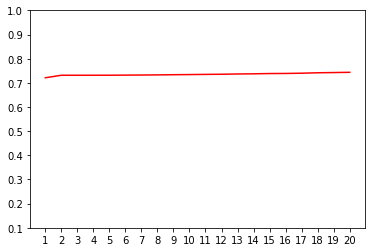

In [17]:
y = np.average(global_accuracy_list, axis = 0)

plt.plot(y, color = 'r')
plt.xticks(ticks = np.arange(0, 20), labels = np.arange(1, 21))
plt.yticks(ticks = np.arange(0.1, 1.1, 0.1))
plt.show()

In [18]:
x = Input(shape = (pad_head, 100))
y = Input(shape = (pad_art, 100))
head = Bidirectional(LSTM(50, dropout = 0.5, return_sequences = False))(x)
art = Bidirectional(LSTM(50, dropout = 0.5, return_sequences = False))(y)
tot = concatenate([head, art], axis = -1)
tot = Dense(16, activation='sigmoid')(tot)
total = Dense(5,activation='softmax')(tot)
model_lstm = Model(inputs = [x, y], outputs = total)
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

fitmodel = model_lstm.fit([head_train, art_train], stance_train, epochs = 20, verbose = 1, shuffle=False)

model_lstm.save('model_lstm.h5')
files.download('model_lstm.h5')

Epoch 1/20
938/938 [==============================] - 18s 19ms/step - loss: 0.8364 - accuracy: 0.7195
Epoch 2/20
938/938 [==============================] - 18s 19ms/step - loss: 0.8002 - accuracy: 0.7314
Epoch 3/20
938/938 [==============================] - 18s 19ms/step - loss: 0.7990 - accuracy: 0.7314
Epoch 4/20
938/938 [==============================] - 18s 19ms/step - loss: 0.7976 - accuracy: 0.7314
Epoch 5/20
938/938 [==============================] - 18s 19ms/step - loss: 0.7955 - accuracy: 0.7314
Epoch 6/20
938/938 [==============================] - 19s 20ms/step - loss: 0.7932 - accuracy: 0.7316
Epoch 7/20
938/938 [==============================] - 18s 19ms/step - loss: 0.7913 - accuracy: 0.7316
Epoch 8/20
938/938 [==============================] - 18s 19ms/step - loss: 0.7892 - accuracy: 0.7321
Epoch 9/20
938/938 [==============================] - 18s 19ms/step - loss: 0.7858 - accuracy: 0.7320
Epoch 10/20
938/938 [==============================] - 18s 19ms/step - loss: 0.783

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>